In [129]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Stats libraries
import statsmodels.api as sm
import scipy

%matplotlib inline

In [173]:
#creating a string that contains the filename, for when a file name is very long. Makes it more readable.
filename = 'All data.xlsm'

df = pd.read_excel(filename, sheetname = 'Multiple Years', index_col='Date')
#To load dataset from excel into python, specified taking data from one sheet called '2013 -2014'
# Also making the column date the index column

# Creating a new column in the data set, which puts all sales amounts in Canadian dollars. 
df['Sales in CAD'] = df['Exchange rate'] * df['Total Sales'] 

df.head()

,Exchange rate,Customers,Total Sales,Year of first order,Sales in CAD
Date,,,,,
2014-08-01,1.0885,Membrane Specialists,425.00,2014-07-01 00:00:00,462.6125
2014-08-06,1.0900,Ozone Water Systems,1711.00,2013,1864.9900
2014-08-08,1.0910,Resla Olcu Kontrol Sistemleri,2648.40,2014-08-01 00:00:00,2889.4044
2014-08-11,1.0920,ASM America Inc.,17445.00,2012,19049.9400
2014-08-12,1.0000,Bruckner Canada,1207.24,2014-08-01 00:00:00,1207.2400


In [131]:
# Data will be downsampled to month, takin the sum of the Sales in each month. 
df_resampled = df.resample('M', how=('sum'))     
df_resampled.head()

,Exchange rate,Total Sales,Sales in CAD
Date,,,
2012-08-31,15,266208.49,266208.49
2012-09-30,15,242972.33,242972.33
2012-10-31,9,78000.68,78000.68
2012-11-30,11,165319.22,165319.22
2012-12-31,2,8561.60,8561.60


In [132]:
#To show only two columns in the table, with Date as index. 
SalesCAD_df = df_resampled[['Sales in CAD']]

# To reset the index to numbers and make Date a regular column again after the resampling.
resampled_ind = SalesCAD_df.reset_index()
resampled_ind.head()

,Date,Sales in CAD
0,2012-08-31,266208.49
1,2012-09-30,242972.33
2,2012-10-31,78000.68
3,2012-11-30,165319.22
4,2012-12-31,8561.60


In [141]:
#Taking the month out of the Date column. 
date= resampled_ind.iloc[0, 0]
type(date.month)

#Creating a new column of month, by taking the month out of the Date column  
resampled_ind['Month'] = resampled_ind['Month'].dt.month
resampled_ind.head()

,Date,Sales in CAD,Month
0,2012-08-31,266208.49,8
1,2012-09-30,242972.33,9
2,2012-10-31,78000.68,10
3,2012-11-30,165319.22,11
4,2012-12-31,8561.60,12


In [154]:
#To show only the two columns Sales in CAD and Month
resampled_month = resampled_ind[['Sales in CAD', 'Month']]

#Renaming the columns
resampled_month.columns = ['Sales_in_CAD', 'Month']
resampled_month.head()

,Sales_in_CAD,Month
0,266208.49,8
1,242972.33,9
2,78000.68,10
3,165319.22,11
4,8561.60,12


C:\Users\mim\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


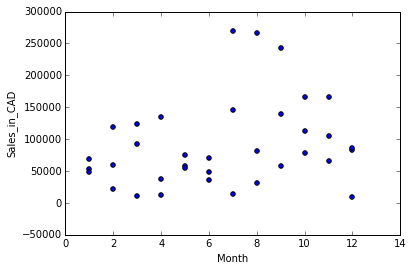

In [155]:
# visualize the relationship between Month of the year and Sales in CAD. 
resampled_month.plot(kind='scatter', x='Month', y='Sales_in_CAD')


#Is there a relationship between Sales and Month of the Year? 
#Hypothesis: There is no relationship between Sales and Month of the Year. 

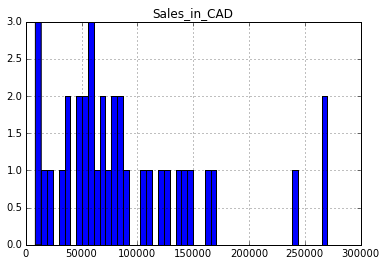

In [172]:
#To see if distribution is normal, use the hist function, which will help decide which statistical test to run
#Look at data with the hist function
#bins numbers od bars in the plot
resampled_month.hist(column='Sales_in_CAD', bins=50)
plt.show()

In [166]:
#Getting a plot of only beginning and end values with bins
beg_end = resampled_month[(resampled_month.Month == 1) | (resampled_month.Month == 12)]
beg_end.head()


,Sales_in_CAD,Month
4,8561.600000,12
5,53179.200000,1
16,82281.359000,12
17,48638.680380,1
28,85777.469182,12


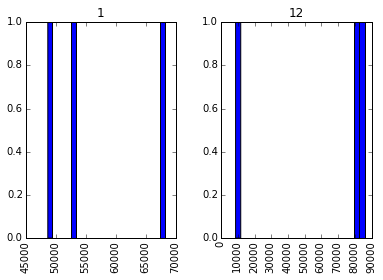

In [167]:
#Look at the data. Looking at distribution at beginning and end of dataset. 
beg_end.hist(by='Month', column='Sales_in_CAD', bins=25)
plt.show()

In [169]:
#Creating variables for each Month at the beginning od year and end of year
#Add Sales_in_CAd because you only want that column 

beg = beg_end.Sales_in_CAD[beg_end.Month == 1]
end = beg_end.Sales_in_CAD[beg_end.Month == 12]

In [177]:
#Run a shapiro test, to find if the distribution is normal. 
#If the p-value (second value) is > 0.05, then the distribution is normal. 
#Shapiro test on the beginning of the dataset
scipy.stats.shapiro(beg)

(0.9130611419677734, 0.42837297916412354)

In [175]:
#Shapiro test on the end of the data set. 
scipy.stats.shapiro(end)

(0.78388512134552, 0.07658052444458008)

In [178]:
#Because both p-values are >0.05 we accept the null hypothesis (that the data are normal), so the data are from a normal distribution.

In [179]:
#Because distribution is normal, we run a linear regression statistical test
lm = sm.formula.ols(formula='Sales_in_CAD ~ Month', data = resampled_month).fit()
lm.params

Intercept    57359.998731
Month         5049.832288
dtype: float64

In [181]:
#to make a list of x values 
#Need to make a new dataframe
x_new = pd.DataFrame({'Month' : range(1,13)})      #time is the column name and range is the range of numbers

In [182]:
y_preds = lm.predict(x_new)

C:\Users\mim\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


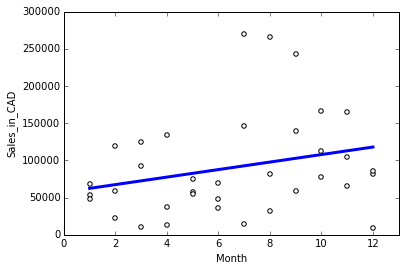

In [185]:
resampled_month.plot(kind='scatter', x='Month', y='Sales_in_CAD', color='w')

plt.xlim(0, 13)
plt.ylim(0, 300000)

plt.plot(x_new, y_preds, c='red', linewidth=3)

In [186]:
#To get all the statistical information of the plotted line
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Sales_in_CAD   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.530
Date:                Thu, 05 Nov 2015   Prob (F-statistic):              0.121
Time:                        11:38:12   Log-Likelihood:                -449.42
No. Observations:                  36   AIC:                             902.8
Df Residuals:                      34   BIC:                             906.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5.736e+04   2.34e+04      2.455      0.0

In [188]:
# print the adjusted R-squared value
lm.rsquared_adj

0.041894329968971133

# This adjusted R-squared value tells us that the model does not fit the data very well. It only explains ~ 4 % of the variance in the data. This tells us that we should try a new model of different shape, that could help us better expplain the variance. 
#This statistical test does not show a siginificant relationship between Sales in CAD and Month of the Year.